In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
!pip install seaborn


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.style.use("seaborn-whitegrid")


In [6]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

### head()를 사용하여 어떤 데이터가 있는지 확인해봅니다.

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 결측값을 확인해줍니다. isnull.sum()을 확인하면 null의 개수를 확인가능합니다.
### 나이와 방호수가 많이 누락되어 있네요.

In [8]:
data.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### '살아남은 것'에 대하여 초점을 맞춰 분석해보겠습니다.
### 'Survived'칼럼을 가지고 놀겠습니다.
### pandas에서 plot.pie를 이용하여 파이차트를 이용하고 
### seaborn의 countplot도 이용하겠습니다.
### 색맹환자를 위해 VIRIDIS를 이용했습니다.
### 돌아가신 사람이 더 많은 것을 확인할 수 있습니다.

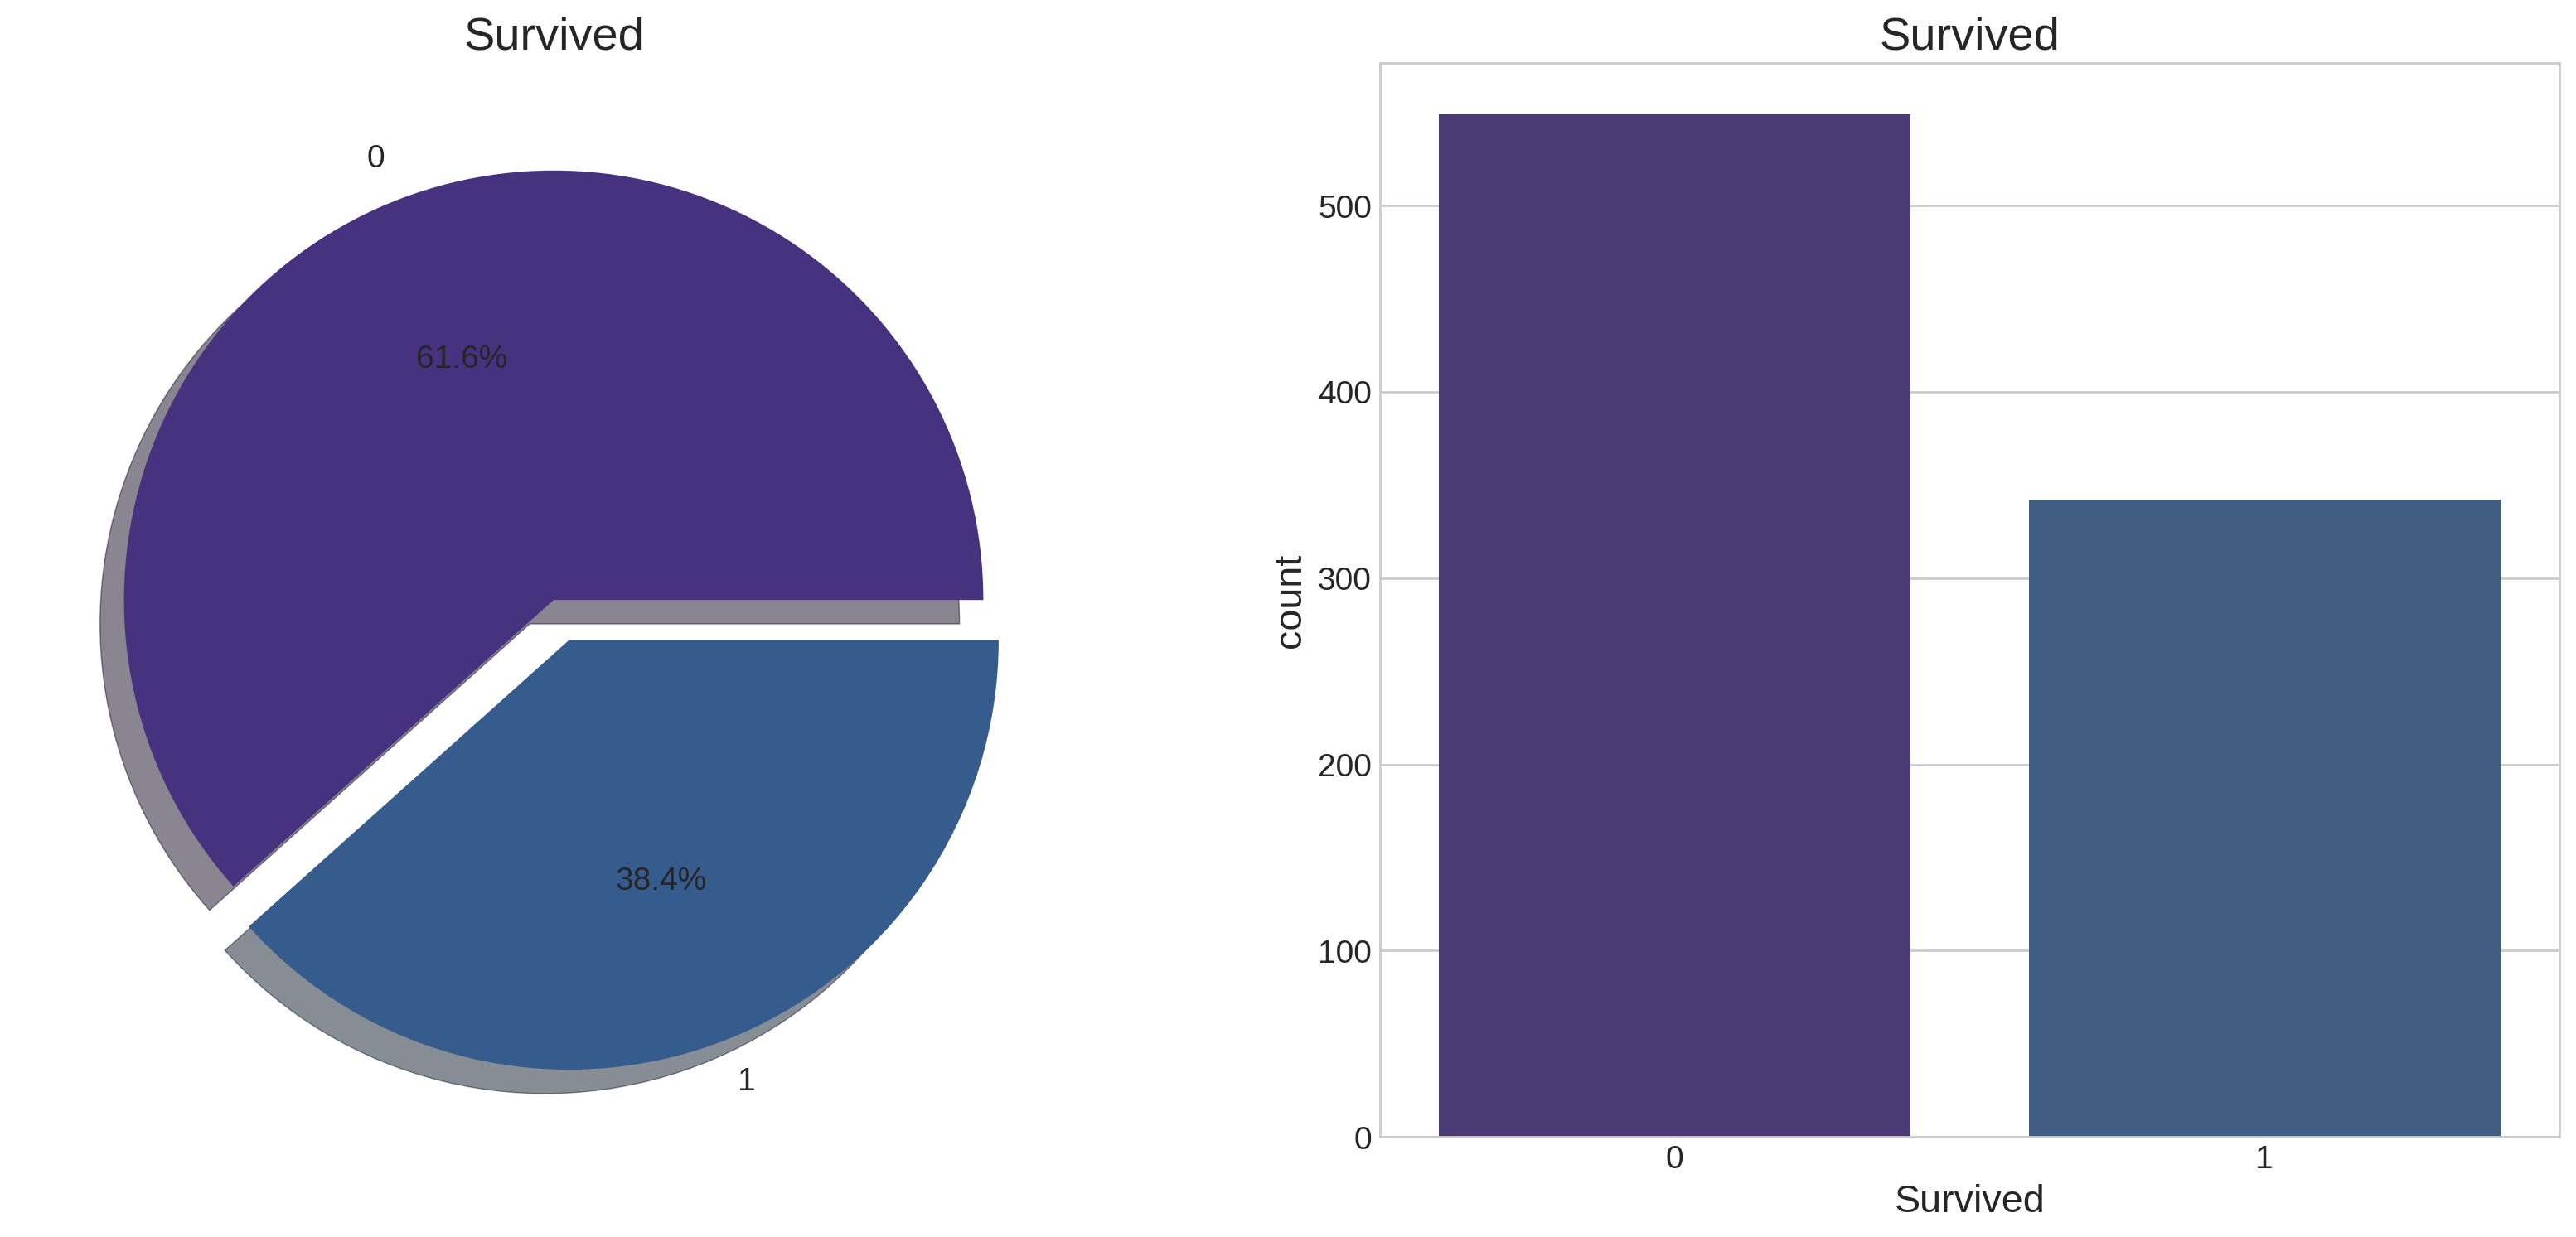

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.set_palette("viridis")

data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()


### 성별로 생존 여부를 확인해보겠습니다.
### 여성이 확실히 더 많이 살아남았습니다.
### 성별로 여성이 70% 이상 더 생존한 것을 알 수 있고, 성별로 남성은 100명 정도 생존, 400명 이상 사망, 여성은 200명 이상 생존, 100명 이하 사망을 그래프로 볼 수 있다.

In [10]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

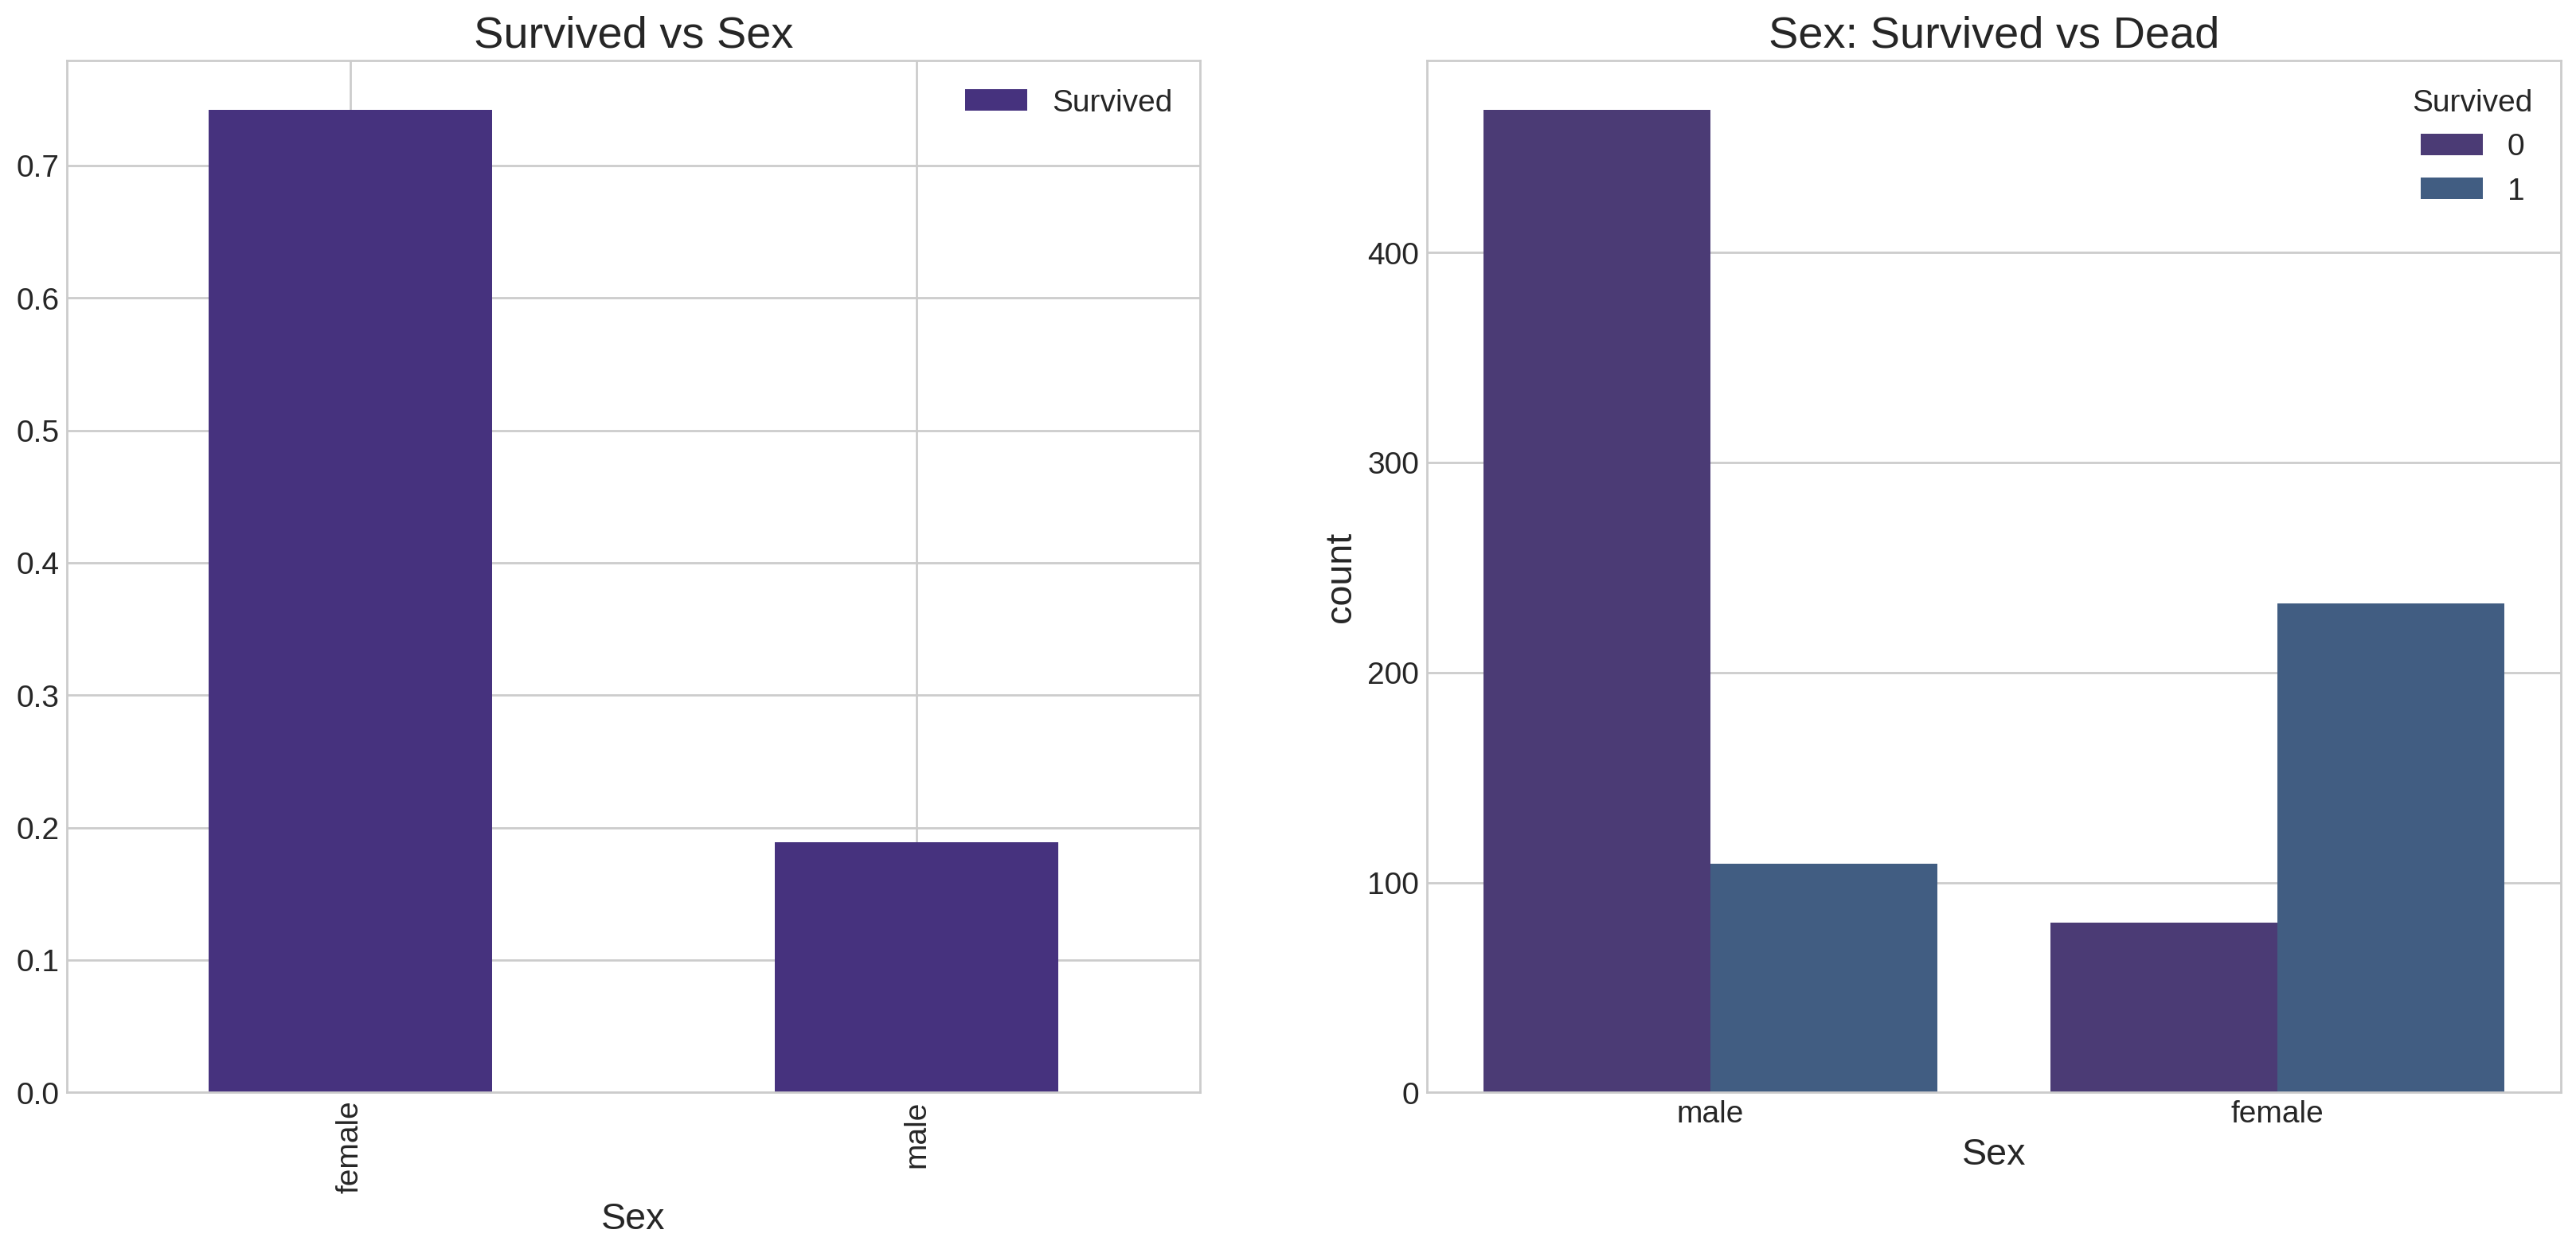

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.set_palette("viridis")

data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()



### Crosstab을 통해 객실 등급(Pclass)에 따른 생존자를 확인해본다.
### 전체 생존자는 1등급 객실이 제일 많았으며, 여성의 생존자가 많은 것을 확인할 수 있다. 슬프게도 3등급 객실의 남성이 제일 사망자가 많은 것을 확인 할 수 있다.

In [12]:
cross_tab = pd.crosstab(data['Pclass'], data['Survived'], margins=True)
cross_tab.style.background_gradient(cmap='viridis')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### 객실별로 3등급 객실에 사람이 제일 많았으며 1등급 객실이 두번째, 2등급 객실이 제일 적었다. 객실별로 생존자는 1등급 객실이 제일 많았으며 3등급 객실이 사망자가 제일 많았다. 

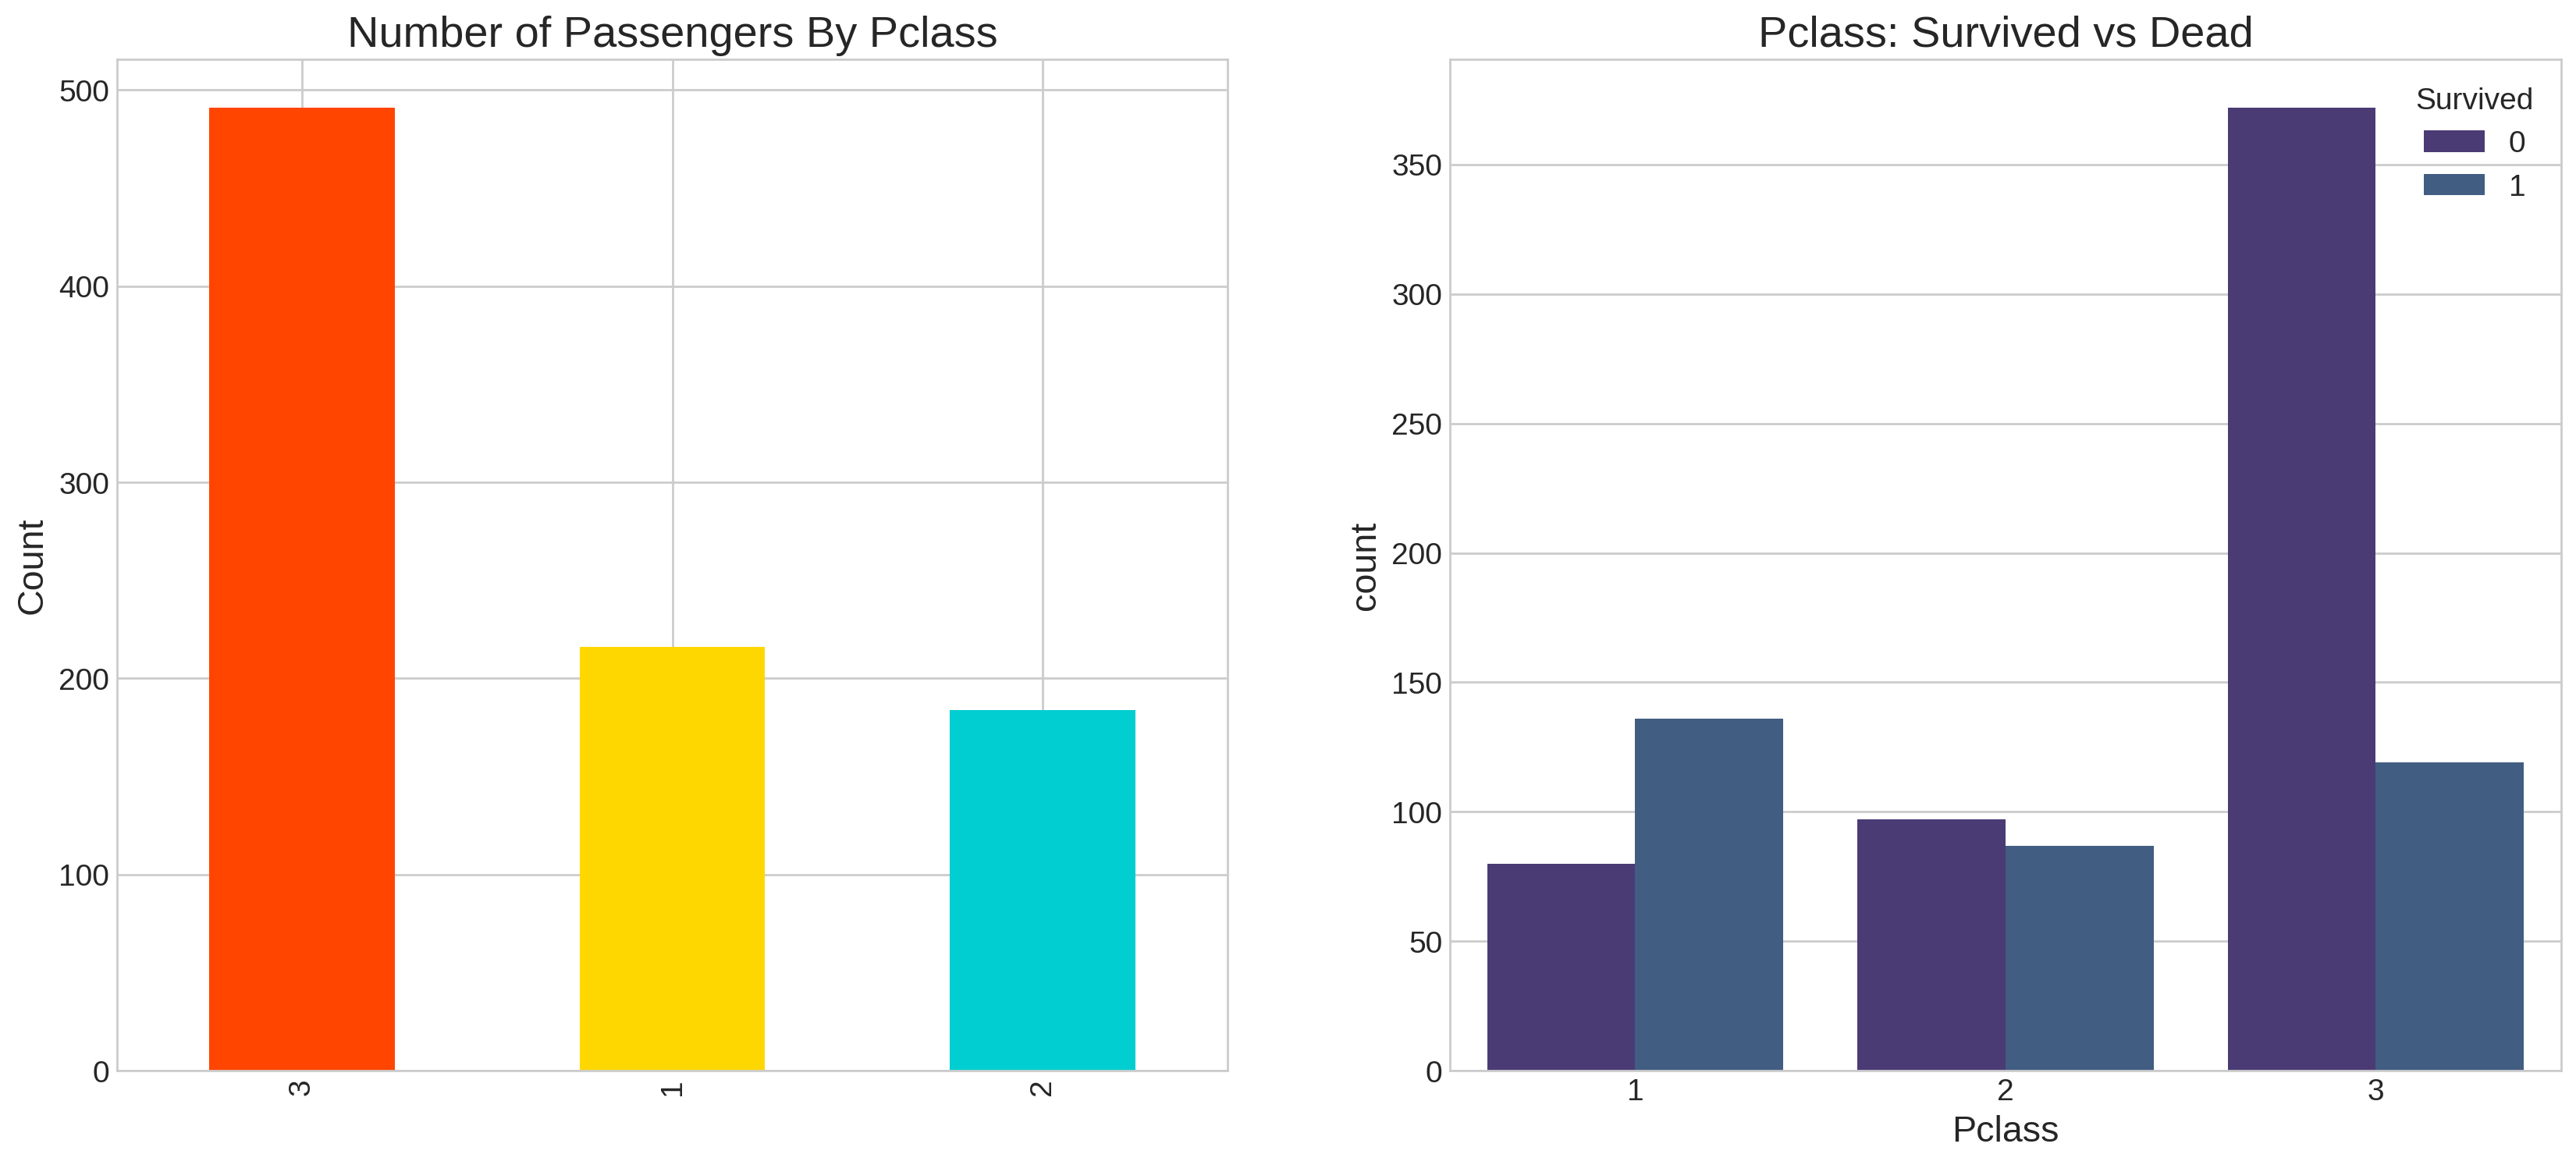

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#FF4500', '#FFD700', '#00CED1'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()


### 전체 생존자는 1등급 객실이 제일 많았으며, 여성의 생존자가 많은 것을 확인할 수 있다. 슬프게도 3등급 객실의 남성이 제일 사망자가 많은 것을 확인 할 수 있다.

In [14]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='winter_r')

### 1등급 객실에 승선한 것이 가장 생존율이 높은 것으로 보이며 특히 여성의 비율이 높다.
### pandas의 crosstab을 이용하여 성별(hue)와 살아남은 것을 묶고, y축으로 Pclass를 두어서 분석한다.
### 그렇게 하면 하나의 표에 3개의 지표를 볼 수 있다.

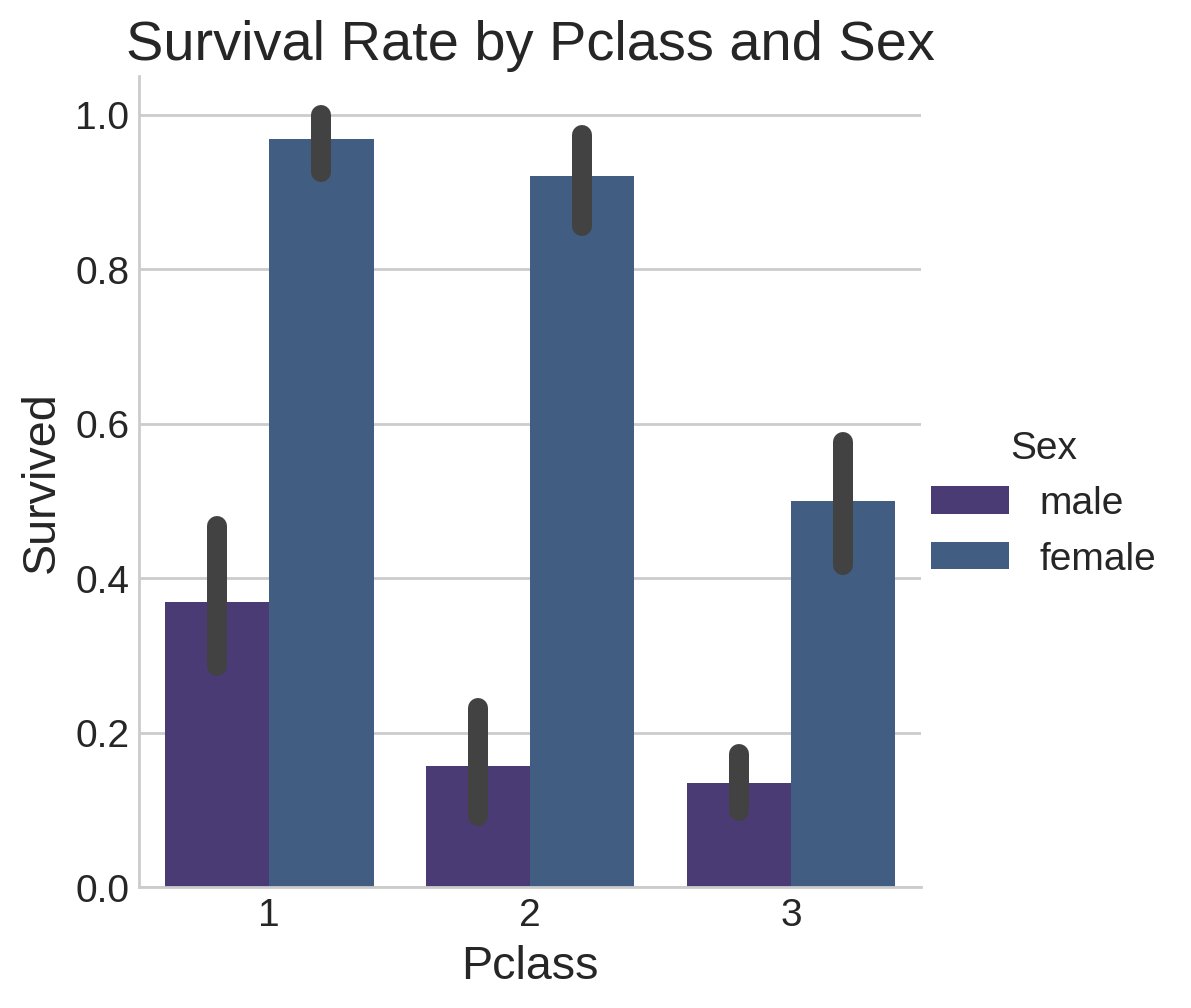

In [15]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='bar')
plt.title('Survival Rate by Pclass and Sex')
plt.show()

### 객실과 나이에 대한 생존자 비율, 성별과 나이에 대한 생존자 비율을 살펴본다.
### 연령은 연속적인 값이기 때문에 그래프에서 yticks를 사용해준다.
### Yticks 함수는 x축의 눈금 위치와 해당 눈금에 표시될 레이블을 지정하는 데 사용된다.
### 사망자의 나이대를 보면 20 ~ 50대의 승객이 많이 분포하고 있다. 0 ~ 10살의 어린아이들은 대부분이 생존자에 속하고, 나이 많은 대략 65세 이상의 노인은 사망자가 더 많다.

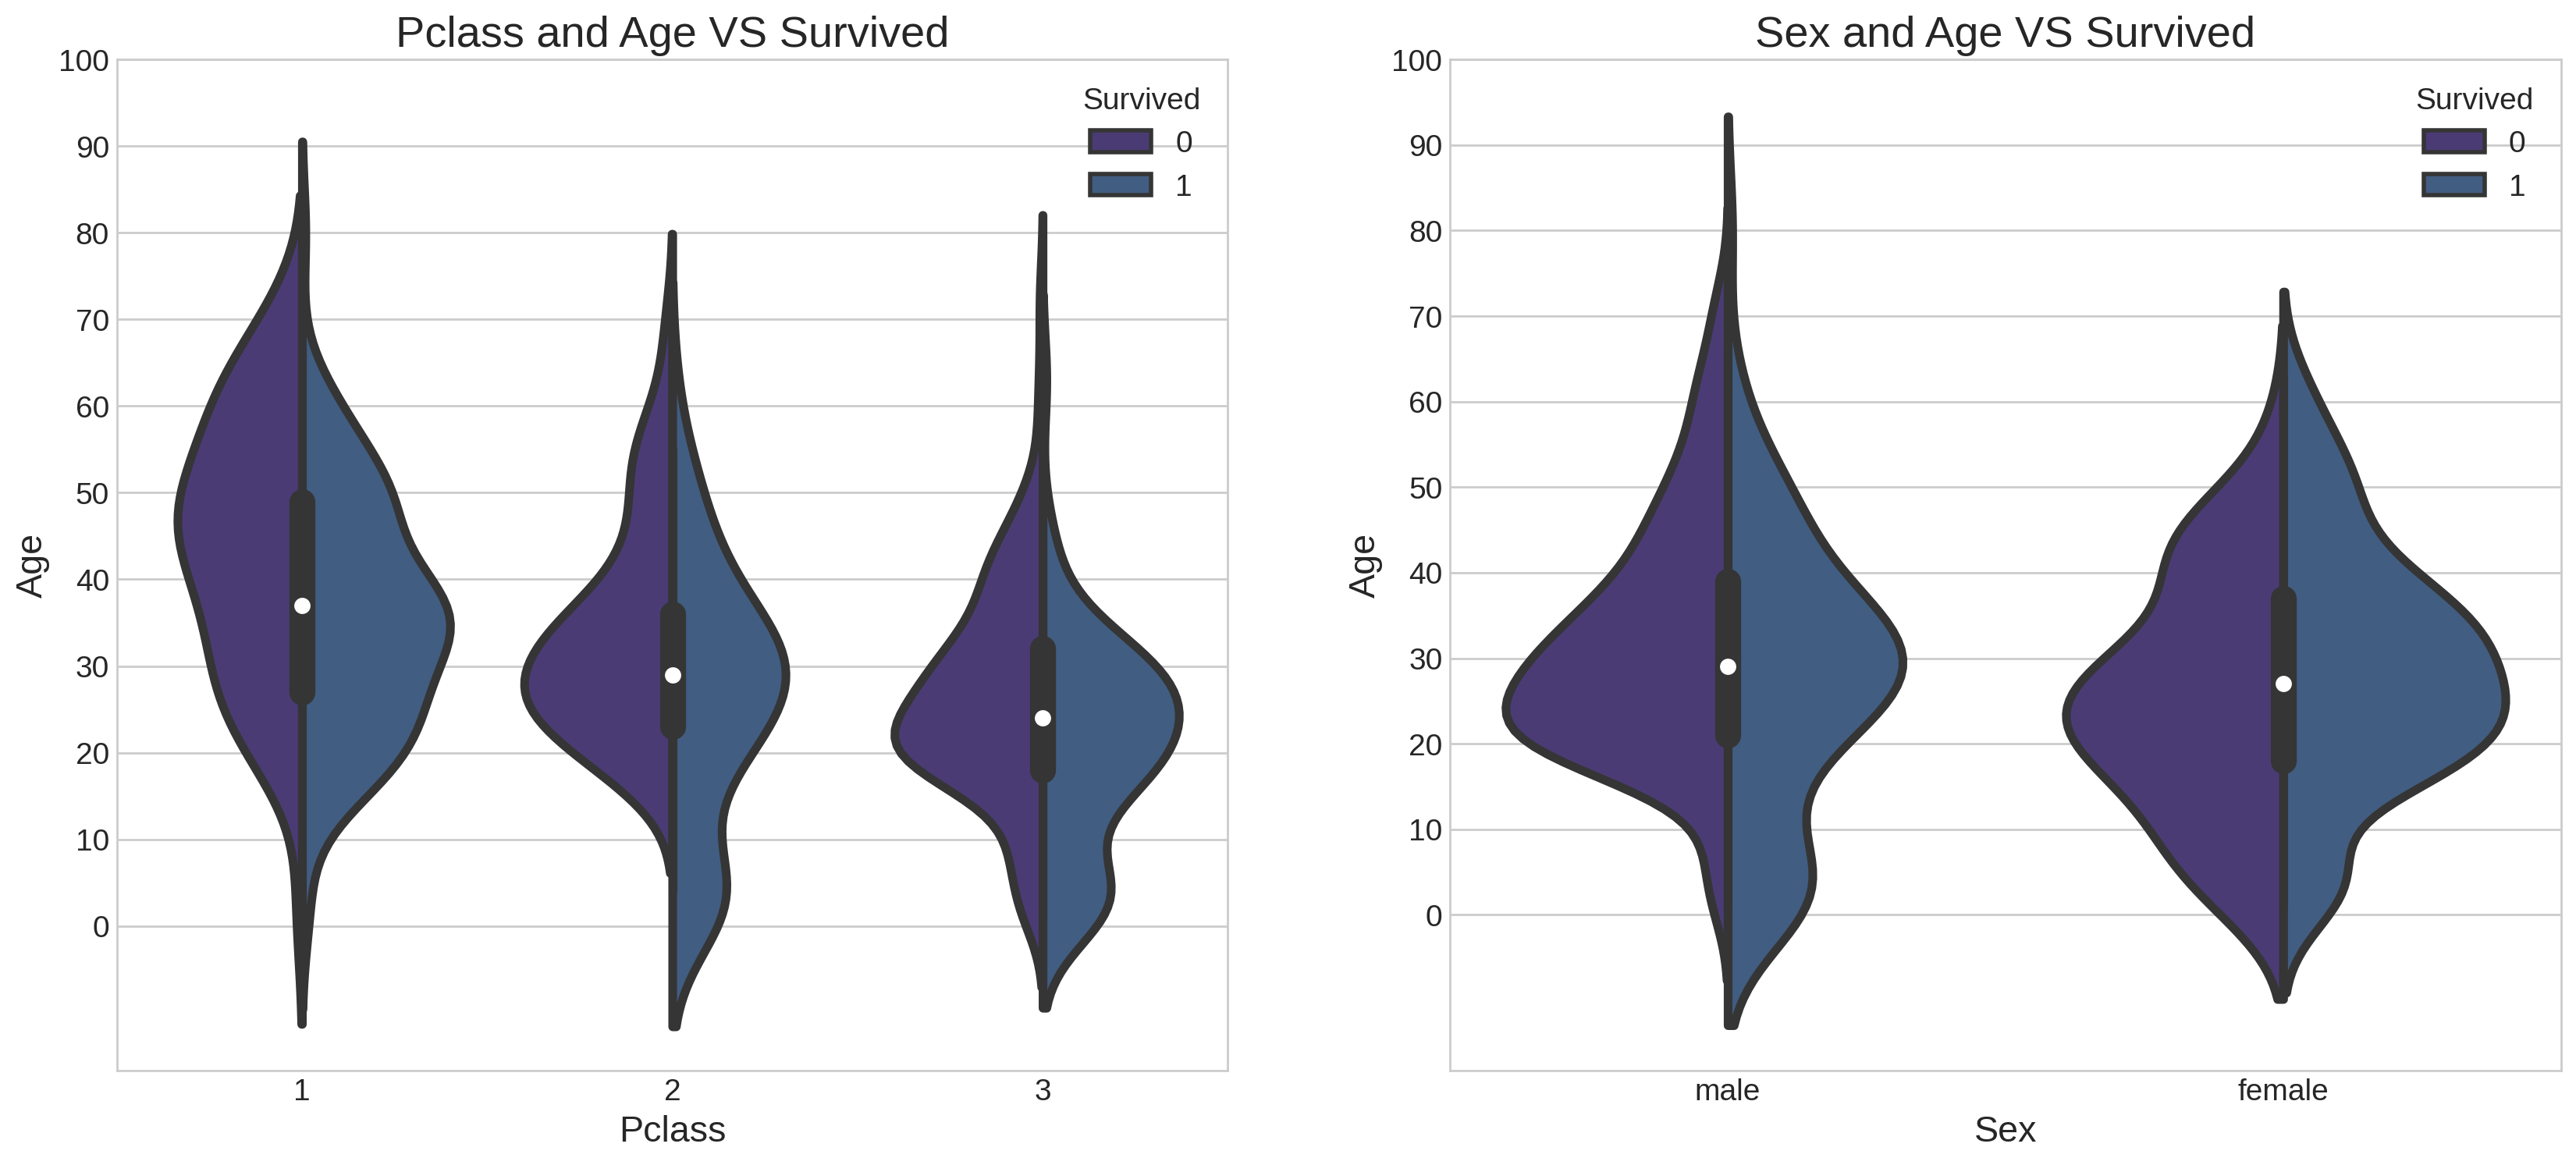

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()


# 이번엔 결측값이 존재하던 Age 피쳐에 값을 넣어보자. 전에는 그냥 평균값을 넣었지만 이번에는 다르게 해보려고 한다. 각 이니셜마다 나이의 평균치를 구해 대입해보려고 한다.



In [17]:
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    #위 extraxt의 의미는 A-Z와 a-z의 문자중 다음 문자로 .이 따라오는 것을 추출

In [18]:
data['Initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [19]:
data['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

# 이상한 이름 변환해줌

In [20]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


# 굿 ㅋ

In [21]:
data['Initial'].value_counts() 

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [22]:
# 위의 null값을 보면 age가 null값이 많다. 

In [23]:
data.groupby('Initial')['Age'].mean()
# 그 이니셜을 가진 인원들의 나이 평균을 구해준다,

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

# 행인: 근데 왜 위처럼 하는것일까? 그냥 대충 null값을 전체 나이 평균값으로 내면 되는데..한 30살 정도던데
# 나: 무식한 놈아.. 어린사람은 0살, 많은 사람은 80살까지 있어. 뭔가 불안하지 않아?

In [24]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age']=46

이 코드는 데이터프레임의 'Age' 열에 결측값이 있는 경우에 해당하는 'Initial' 값에 따라 'Age' 값을 적절하게 채워넣는 것을 목적으로 합니다. 예를 들어, 'Initial'이 'Mr'인 경우 'Age'를 33으로 설정하고, 'Initial'이 'Mrs'인 경우 'Age'를 36으로 설정합니다. 이러한 식으로 결측값을 대체하는 것은 데이터 분석 또는 모델링 작업에서 일반적인 전처리 단계입니다.

In [25]:
data.Age.isnull().any()

False

# 아래의 그래프는 살아남은 사람과 살아남지 못한 사람을 연령대별로 시각화하였다.
# 30,40대가 많이 살아남고 살아남지 못하였다. 
# 대체로 어린아이들도 많이 사살아남았다. 

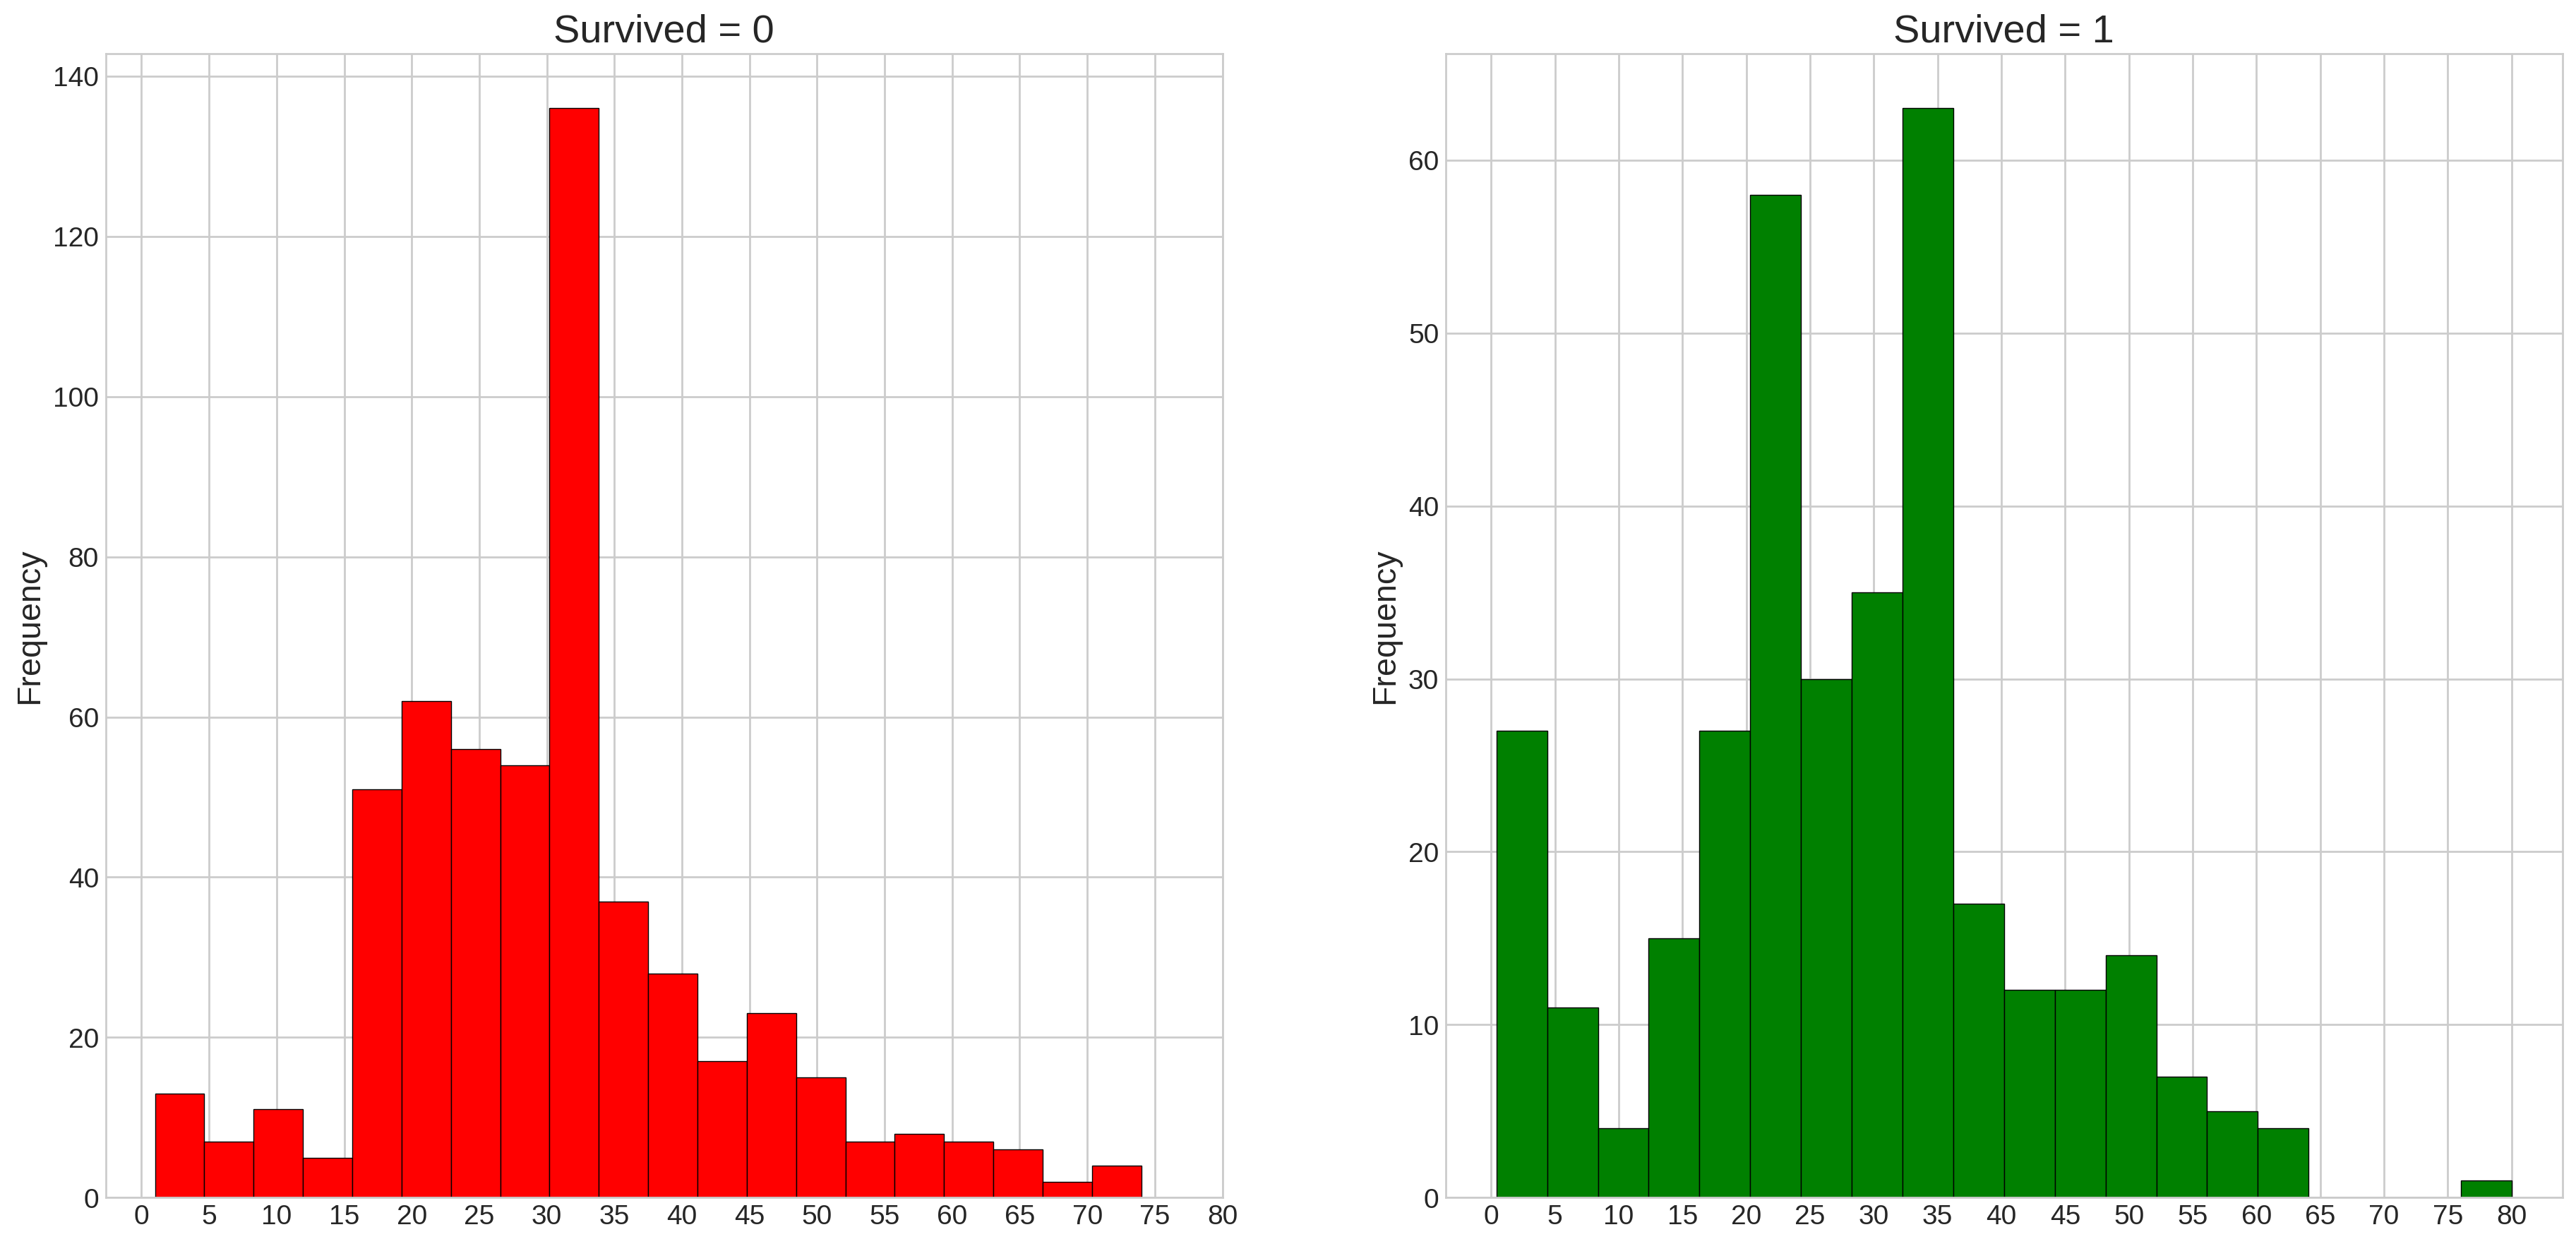

In [26]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20,edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()


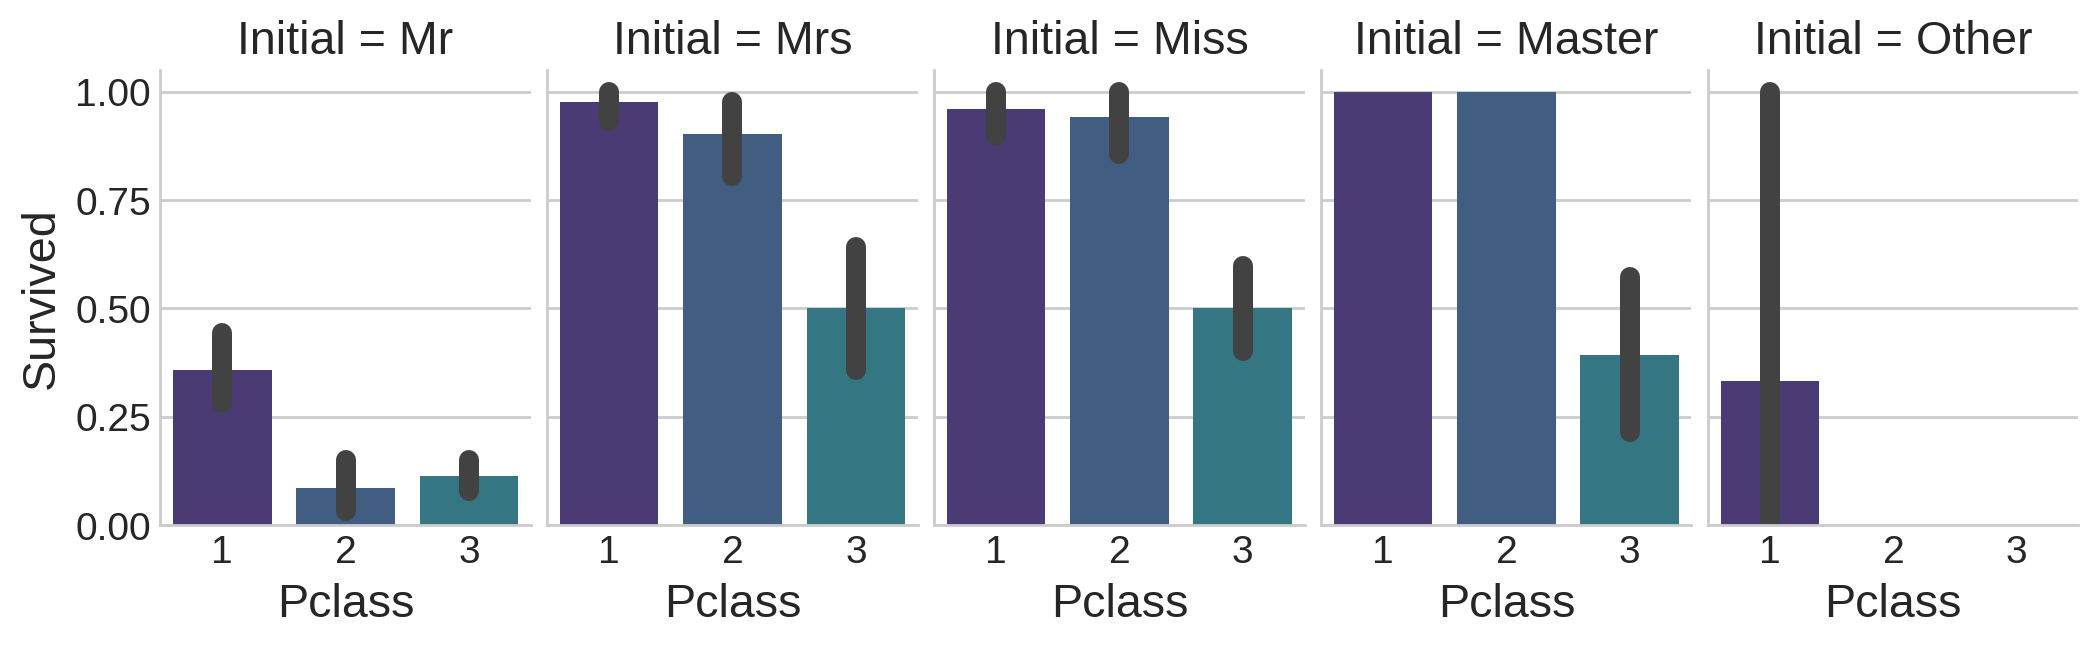

In [27]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 3)
plt.show()

# Check Sibsip
sibsip는 형제자매(Siblings)와 배우자(Spouses)의 수를 나타내는 열(column)

In [28]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient('viridis')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [29]:
print(data.SibSp)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64


# 1,2명씩 같이 온 사람들이 확실히 살 확률이 높구나.
# 4명씩 같이 온 사람들은 오히려 많이 죽었네

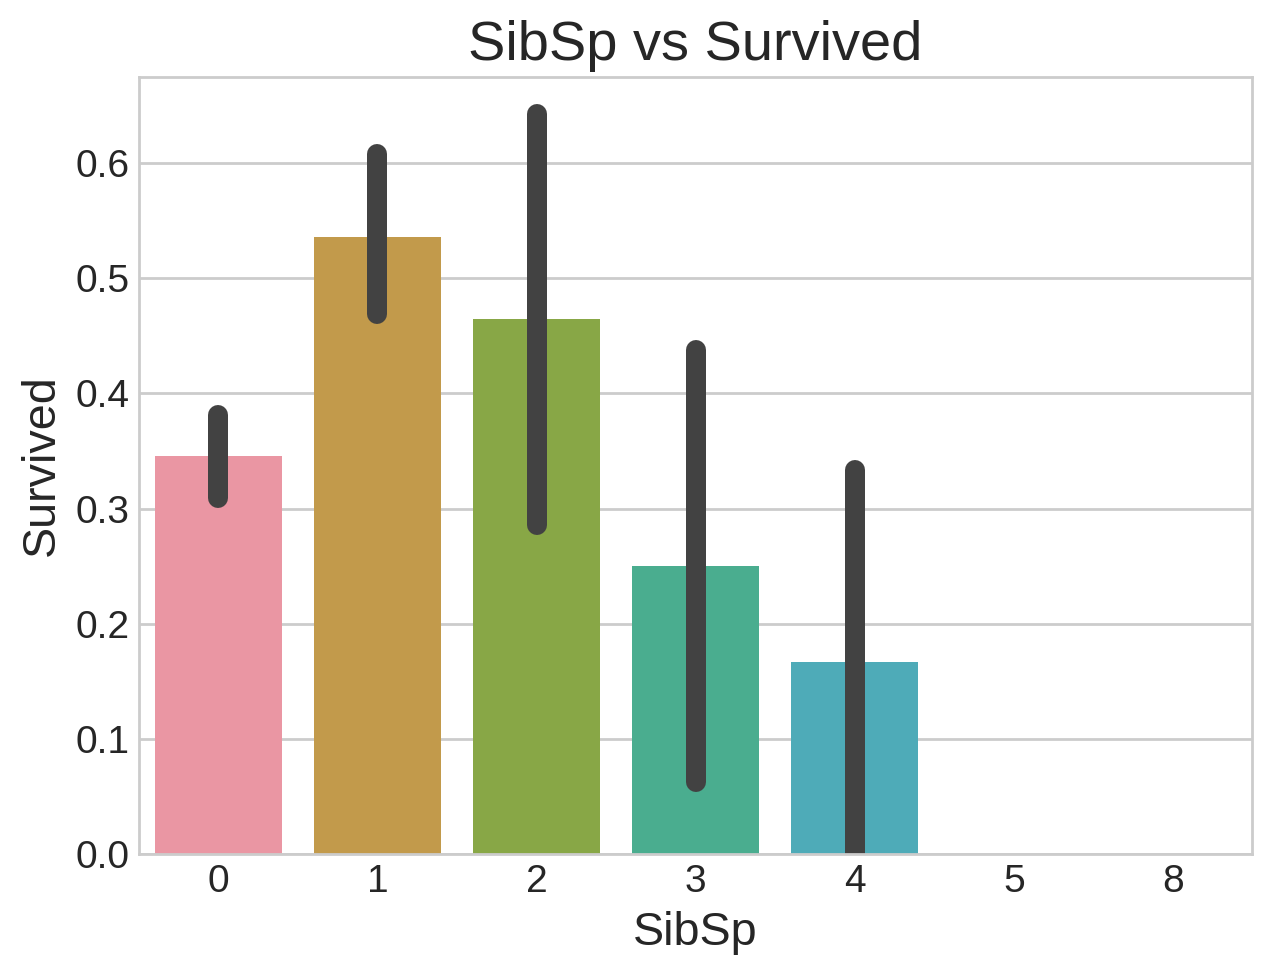

In [30]:
sns.barplot(x='SibSp', y='Survived', data=data).set_title('SibSp vs Survived')
plt.show()


In [31]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient('viridis')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Check Parch

# parch는 부모,자녀 수를 나타낸다. 
# 부모, 자녀와 함께 오지 않은 숫자가 많네

In [32]:
pd.crosstab(data.Parch, data.Survived).style.background_gradient('viridis')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


# 

In [33]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient('viridis')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


0~3명보다 1~3명일 때 생존 확률이 높다.

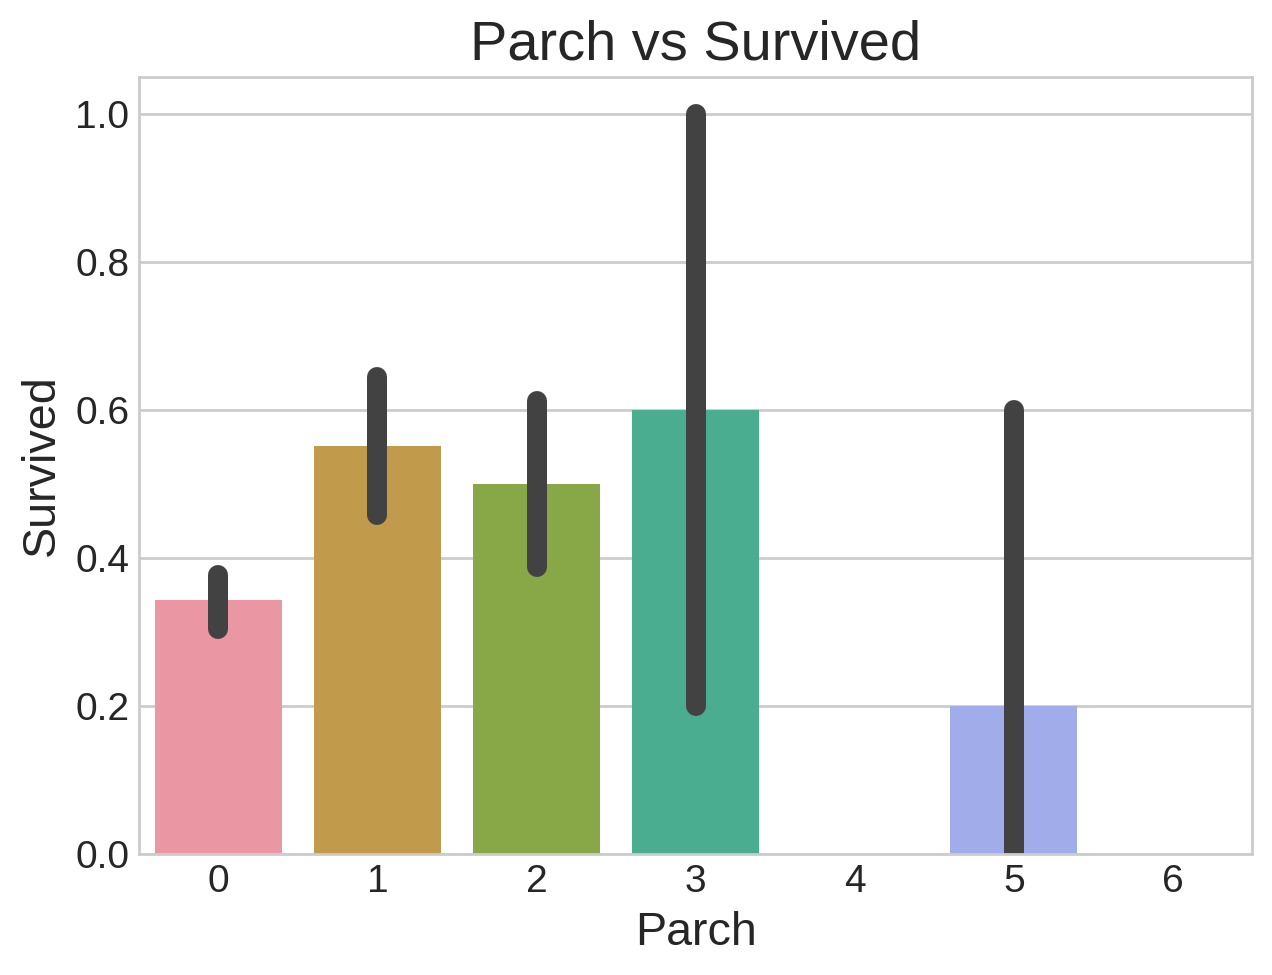

In [34]:
sns.barplot(x='Parch', y='Survived', data=data).set_title('Parch vs Survived')
plt.show()


# Fare(continous) Analysis

In [35]:
print('Highest Fare was : ', data['Fare'].max())
print('Lowest Fare was : ', data['Fare'].min())
print('Average Fare was : ', data['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.204207968574636


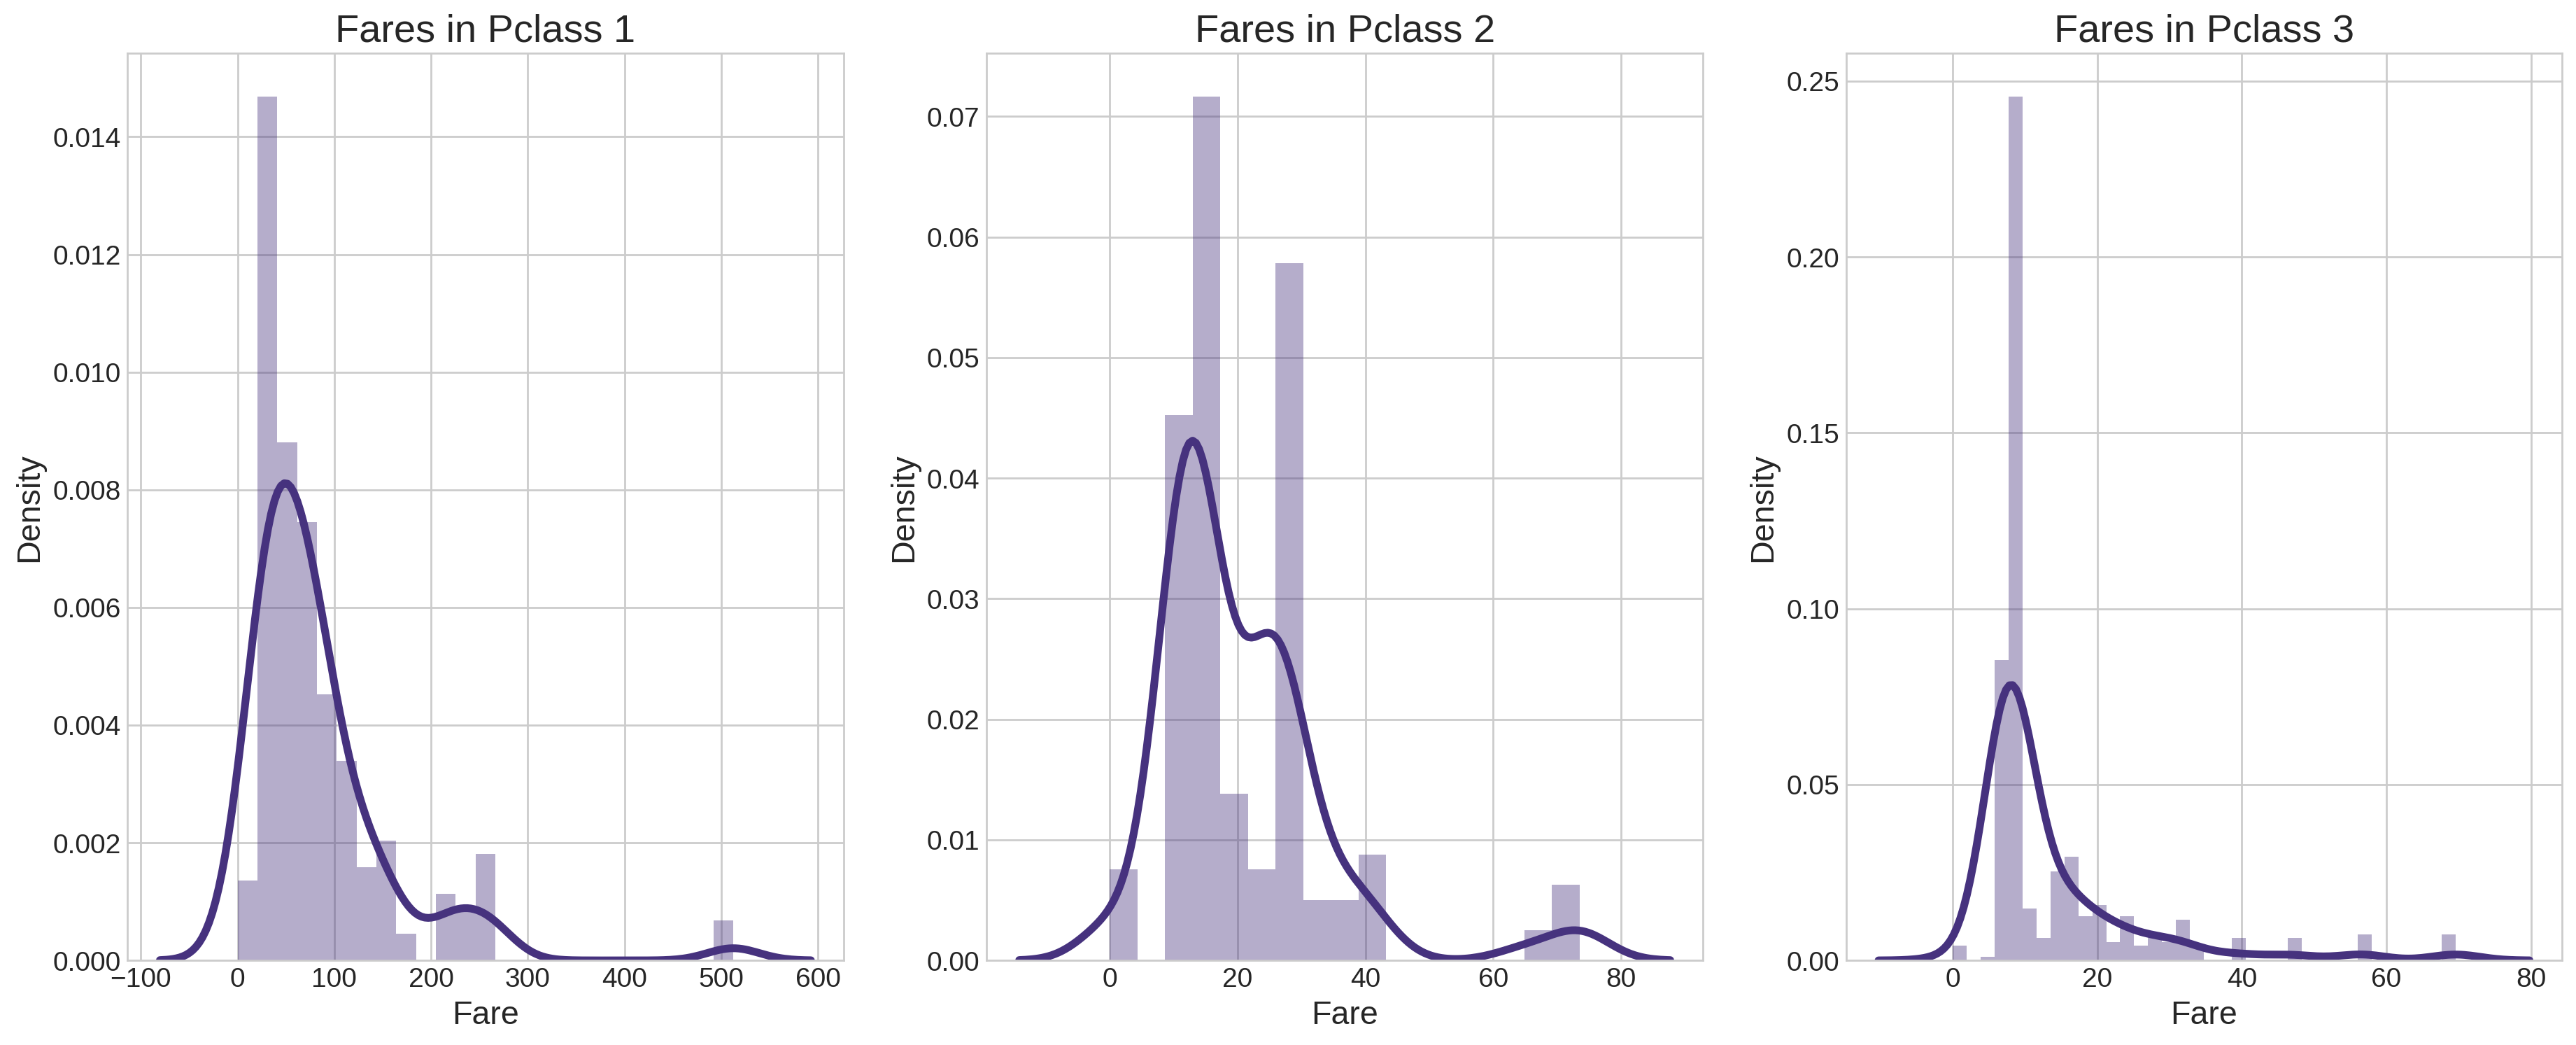

In [36]:

ig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [37]:
data.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

# Sex : 남성보다 여성의 생존율이 높다. 이는 구조가 여성이 우선한다
# Pclass : Pclass 1의 승객의 생존율이 높다. 반면에 3은 낮다. 여성에게는 Pclass 1이 거의 1등이고, 2등도 높다.
# Age : 5 ~ 10살의 아이들의 생존율이 높고 15~35살의 성인들이 많이 사망했다.
# Parch + SibSp : 1 ~ 2 SibSP, Spouse on board or 1~3 Parents의 생존율이 높다. 혼자오거나 대가족은 상대적으로 낮다.

# 상관계수

다중공산성(multicollinearity)은 회귀 분석에서 독립 변수들 간에 강한 선형 관계가 있는 경우 발생하는 문제입니다. 다중공산성은 회귀 분석 모델의 성능을 약화시킬 수 있으며, 변수들 간의 독립성을 해치기 때문에 회귀 계수의 해석이 어려워질 수 있습니다.

일반적으로, 다중공산성은 다음과 같은 상황에서 발생할 수 있습니다:

상관 관계가 높은 변수들: 독립 변수들 간에 강한 선형 관계가 있는 경우, 회귀 분석에서 이들 변수들을 함께 포함하면 다중공산성이 발생할 수 있습니다.

변수들의 선형 종속성: 독립 변수들 중 일부가 다른 독립 변수들의 선형 조합으로 나타나는 경우, 다중공산성이 발생할 수 있습니다. 예를 들어, 변수 A = 2 * 변수 B라면, 변수 A와 B는 선형 종속이며 다중공산성이 발생합니다.

다중공산성이 발생하면 회귀 분석 결과의 신뢰도가 저하될 수 있습니다. 다중공산성이 있는 경우, 회귀 계수의 추정치가 불안정해지며, 변수들의 영향력을 올바르게 해석하기 어려워집니다. 또한, 변수 선택과 모델 평가 등의 작업에서도 문제가 발생할 수 있습니다.

다중공산성을 해결하거나 완화하기 위한 몇 가지 방법이 있습니다:

상관 관계가 높은 변수 제거: 변수들 간의 강한 선형 관계가 있는 경우, 이 중 하나의 변수를 제거하여 다중공산성을 해결할 수 있습니다. 이를 통해 모델의 성능과 해석력을 개선할 수 있습니다.

변수 변환: 변수들을 변환하여 다중공산성을 완화할 수 있습니다. 예를 들어, 변수의 로그 변환, 제곱근 변환 등을 통해 선형 관계를 줄일 수 있습니다.

변수 선택 기법: 다중공산성이 있는 변수들 중 가장 중요한 변수를 선택하는 변수 선택 기법을 사용할 수 있습니다. 이를 통해 변수의 수를 줄이고 다중공산성을 완화할 수 있습니다.

정규화(regularization): 정규화 기법인 릿지(Ridge) 회귀나 라쏘(Lasso) 회귀를 사용하여 다중공산성을 완화할 수 있습니다

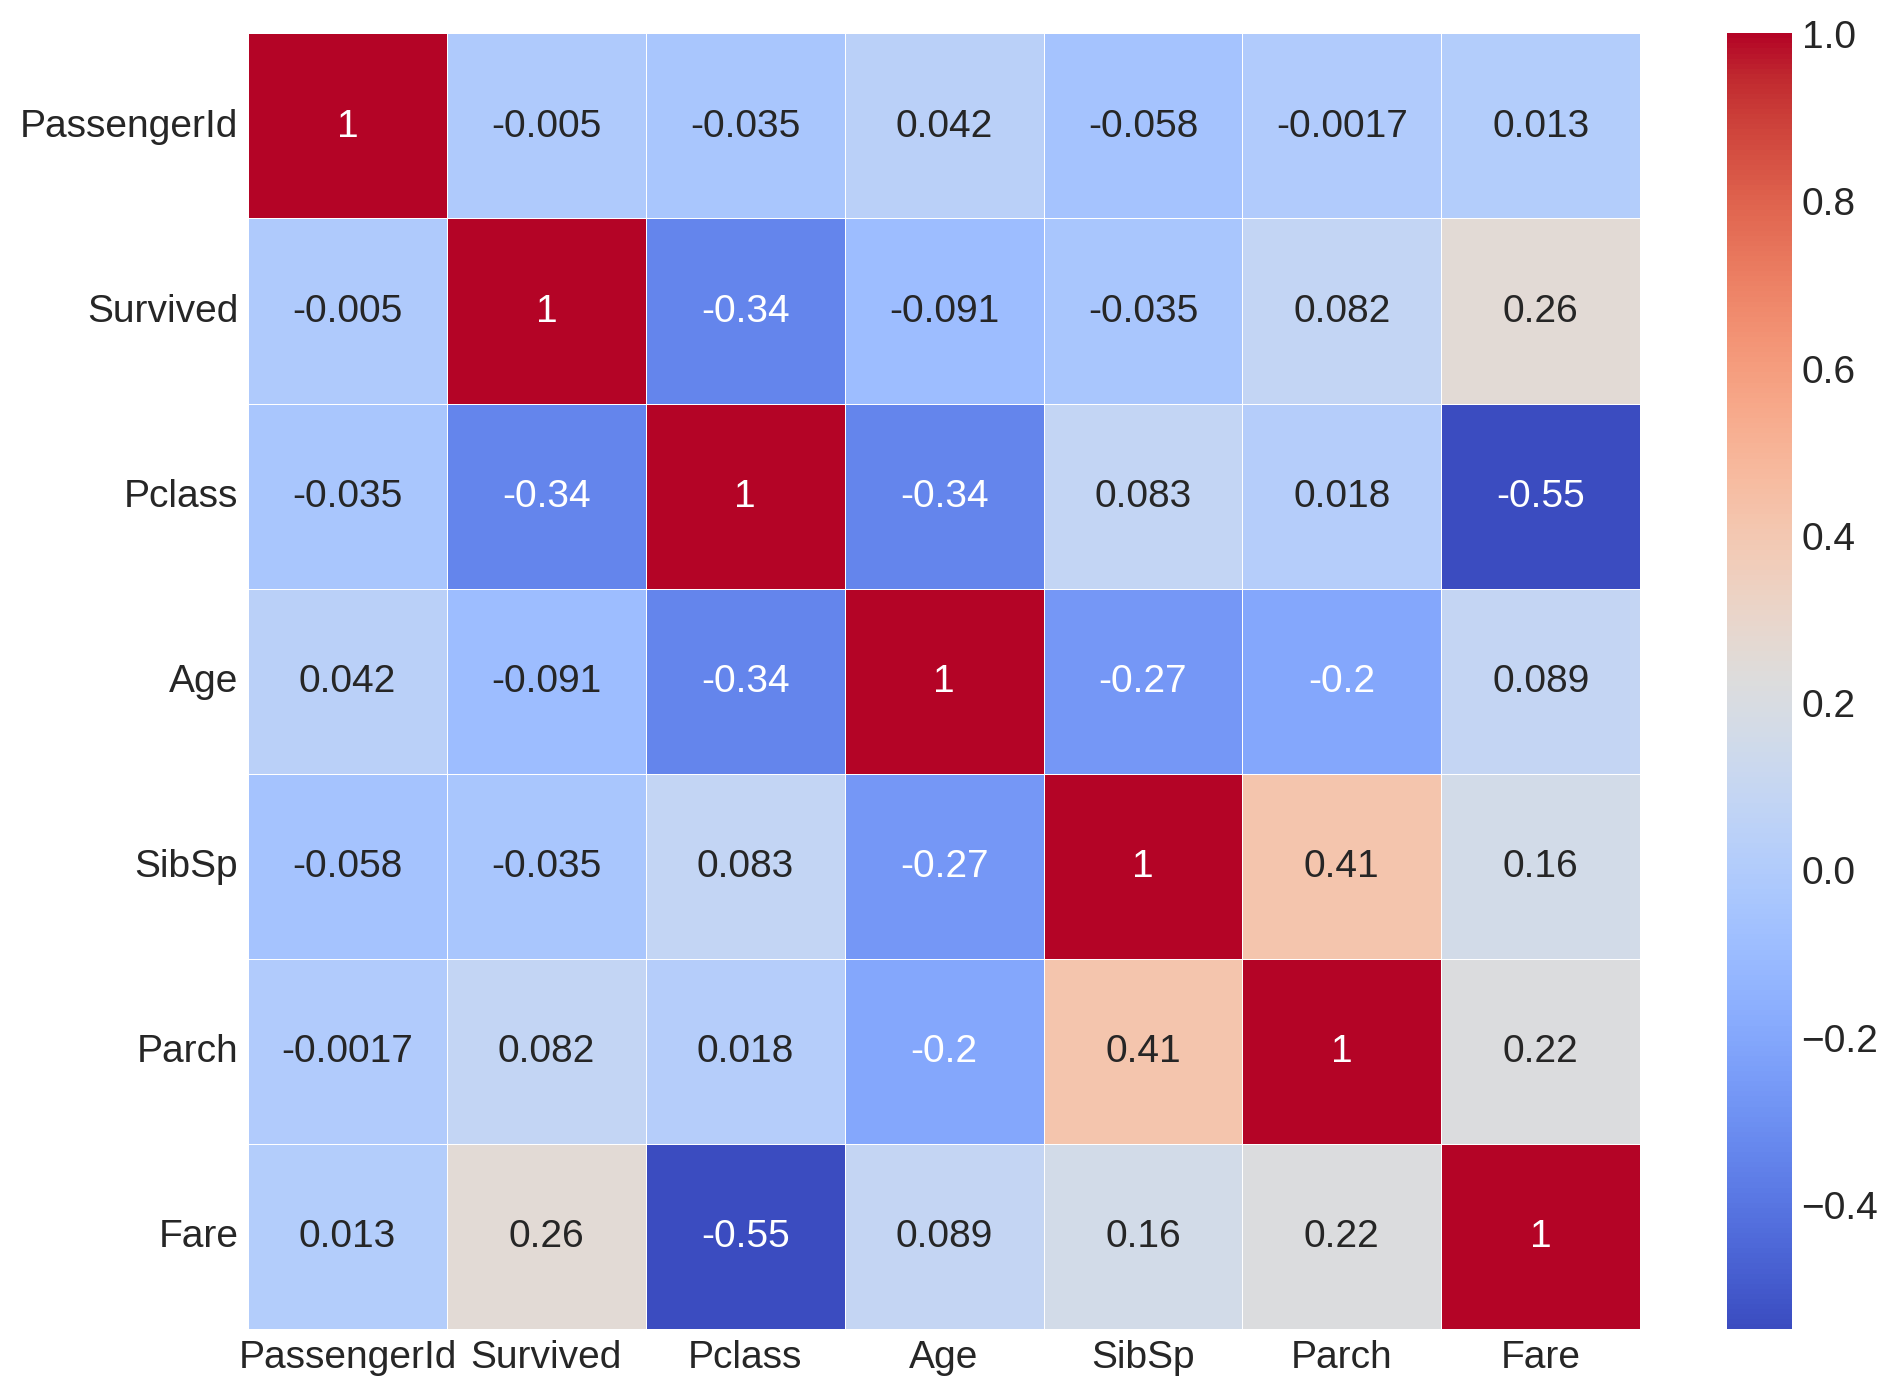

In [38]:

# Create the correlation matrix
corr_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap with blue and orange colors
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2)

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(10, 8)

# Display the plot
plt.show()

# 알파벳이나 문자열 사이에 상관관계는 없기 때문에 수치형 변수에만 적용
# 만약 상관계수가 높다면 다중공산성 문제 발생
# 이는 ML 모델을 학습시킬 때 성능 약화


heat맵을 통해 각 변수끼리의 상관계수를 구했다. Pclass와 Fare의 상관계수는 상대적으로 높은 편에 속한다. 주의해서 봐야할 변수라고 생각.

# 이제 EDA는 끝났다. del을 이용해 기존에 사용 중이던 Data는 메모리에서 지운다. 그리고 train과 test를 키워드로 데이터를 다시 읽어드린다.


In [39]:
del data

In [40]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test =  pd.read_csv('/kaggle/input/titanic/test.csv')

In [41]:
train_test = [train, test]

In [42]:
print(train_test[0].shape)
print(train_test[1].shape)

(891, 12)
(418, 11)


 # 're' 모듈을 사용하여 패턴 일치, 검색 및 바꾸기, 문자열 분할 등과 같은 다양한 작업을 수행할 수 있습니다.

In [43]:
import re